In [11]:
#import required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# Load the dataset
df = pd.read_csv('../results/outputs/data_with_basic_features.csv')

In [13]:
# implementation
scaler = MinMaxScaler()

# Identify numeric columns (excluding target and categorical groups)
numeric_cols = ['year', 'km_driven', 'car_age', 'avg_km_per_year', 
                'brand_popularity', 'price_per_km']

df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("First few rows of scaled numeric columns:\n", df_scaled[numeric_cols].head())
print("Target 'selling_price' remains unscaled:\n", df_scaled['selling_price'].head())

First few rows of scaled numeric columns:
        year  km_driven   car_age  avg_km_per_year  brand_popularity  \
0  0.315789   0.421683  0.684211         0.137252          1.000000   
1  0.315789   0.301201  0.684211         0.098036          1.000000   
2  0.578947   0.602407  0.421053         0.277775          0.578947   
3  0.842105   0.277104  0.157895         0.219045          0.026316   
4  0.684211   0.849397  0.315789         0.469998          0.188259   

   price_per_km  
0      0.000002  
1      0.000039  
2      0.000023  
3      0.000020  
4      0.000011  
Target 'selling_price' remains unscaled:
 0     60000.000000
1    504355.832295
2    600000.000000
3    250000.000000
4    450000.000000
Name: selling_price, dtype: float64


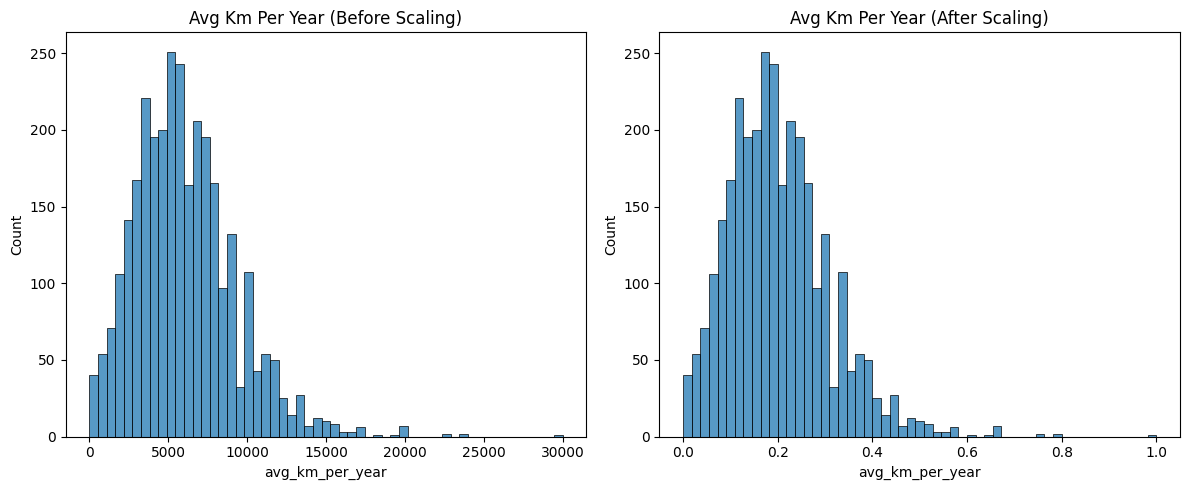

In [14]:
# EDA Visualization: Histogram before and after scaling 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['avg_km_per_year'], ax=axes[0])
axes[0].set_title("Avg Km Per Year (Before Scaling)")
sns.histplot(df_scaled['avg_km_per_year'], ax=axes[1])
axes[1].set_title("Avg Km Per Year (After Scaling)")
plt.tight_layout()
plt.savefig('../results/eda_visualizations/histogram_scaling_avg_km.png')
plt.show()

In [15]:
# Save output
df_scaled.to_csv('../results/outputs/scaled_data.csv', index=False)